# Example_6_1

Coordinate descent convergence for ridge regression

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/jdariasl/OTBD/main/content/init.py
import init; init.init(force_download=False)

In [1]:
import numpy as np
from local.lib.utils import ridge_reg, ridge_reg_acc, ridge_reg_gcd
import matplotlib.pyplot as plt

In [ ]:
# Problem definition
Nc=500                    # Number of columns
Nr=400                    # Number of rows
Niter=400
X=np.random.randn(Nr,Nc)
wopt_nor=np.random.randn(Nc,1)
y=X@wopt_nor+np.random.randn(Nr,1)*np.sqrt(.001)       # We generate the ragression data
autoval=np.abs(np.linalg.eig(X.T@X)[0])
L=np.max(autoval)
lambd=0.04*L
wopt_strong=np.linalg.inv(X.T@X+lambd*np.eye(Nc))@X.T@y
Ls=L+lambd
mu=np.min(autoval)+lambd
eta=1/L
eta_strong=2/(Ls+mu)

# Ridge with regularizer / accelerated
w=np.zeros((Nc,Niter+1))
f_r, _ = ridge_reg(Niter,w,X,y,eta_strong,lambd,wopt_strong)
f_r_acc, _ = ridge_reg_acc(Niter,w,X,y,lambd,wopt_strong,Ls,mu);
f_r_gcd, f_opt = ridge_reg_gcd(Niter,w,X,y,lambd,wopt_strong);

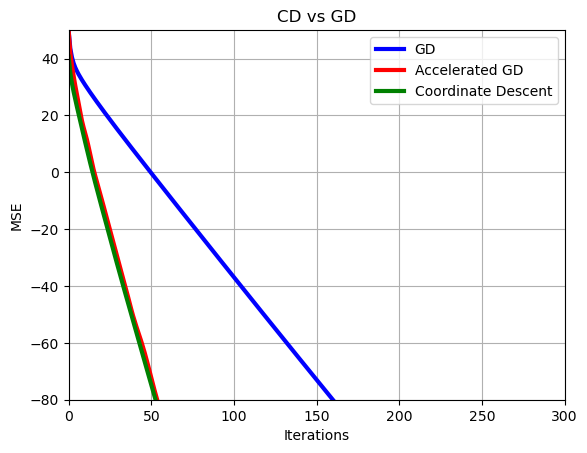

In [5]:
plt.plot(range(Niter+1),10*np.log10(np.abs(f_r-f_opt)+np.finfo(float).eps),'b', linewidth = 3, label = 'GD')
plt.plot(range(Niter+1),10*np.log10(np.abs(f_r_acc-f_opt)+np.finfo(float).eps),'r', linewidth = 3, label = 'Accelerated GD')
plt.plot(range(Niter+1),10*np.log10(np.abs(f_r_gcd-f_opt)+np.finfo(float).eps),'g', linewidth = 3, label = 'Coordinate Descent')
plt.legend()
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.grid()
plt.title('CD vs GD')
plt.xlim([0, 300])
plt.ylim([-80, 50])
plt.show()